In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import math
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns

## Preprocess 
Features explaination 

1. Fixed acidity. The predominant fixed acids in wine, such as tartaric, succinic, citric, and malic acids.
2. Volatile acidity. The high acetic acid present in wine, which causes an unpleasant vinegar taste.
3. Citric acid. A weak organic acid used to increase the freshness and flavor of wine.
4. Residual sugar. The amount of sugar left after fermentation.
5. Chlorides. The amount of salt in wine. The lower chloride rate creates better quality wines.
6. Free sulfur dioxide. SO2 is used for preventing wine from oxidation and microbial spoilage.
7. Total sulfur dioxide. The amount of free and bound forms of SO2.
8. Density. Depends on the alcohol and sugar content. Better wines usually have lower densities.
9. pH. Used to check the level of acidity or alkalinity of wine.
10. Sulfates. An antibacterial and antioxidant agent added to wine.
11. Alcohol. The percentage of alcohol in wine. A higher concentration leads to better quality.

In [2]:
# load the dataset
df = pd.read_csv(r"C:\Users\choon\Documents\Chi Ling\BCSCUN\Machine Learning\winequalityN.csv")

In [3]:
# Display the number of missing values in each column
print(df.isnull().sum())

# Drop rows with null values
df_cleaned = df.dropna()

# Display the cleaned dataframe
print(df_cleaned.info())


type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 6463 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6463 non-null   object 
 1   fixed acidity         6463 non-null   float64
 2   volatile acidity      6463 non-null   float64
 3   citric acid           6463 non-null   float64
 4   residual sugar        6463 non-null   float64
 5   chlorides             6463 non-null   float64
 6   free sulfur dioxide   6463 non-null   float64
 7   total sulfur dioxide  6463 non-null   float64
 8   density            

In [4]:
# creating Dataframe object
print(df_cleaned.head())
print(df_cleaned.shape)

    type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.4

In [5]:
print(df_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
Index: 6463 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6463 non-null   object 
 1   fixed acidity         6463 non-null   float64
 2   volatile acidity      6463 non-null   float64
 3   citric acid           6463 non-null   float64
 4   residual sugar        6463 non-null   float64
 5   chlorides             6463 non-null   float64
 6   free sulfur dioxide   6463 non-null   float64
 7   total sulfur dioxide  6463 non-null   float64
 8   density               6463 non-null   float64
 9   pH                    6463 non-null   float64
 10  sulphates             6463 non-null   float64
 11  alcohol               6463 non-null   float64
 12  quality               6463 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 706.9+ KB
None


In [6]:
print(df_cleaned.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6463.000000       6463.000000  6463.000000     6463.000000   
mean        7.217755          0.339589     0.318758        5.443958   
std         1.297913          0.164639     0.145252        4.756852   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6463.000000          6463.000000           6463.000000  6463.000000   
mean      0.056056            30.516865            115.694492     0.994698   
std       0.035076            17.758815             56.526736     0.003001   
min       0.009000             1.000000         

## EDA  

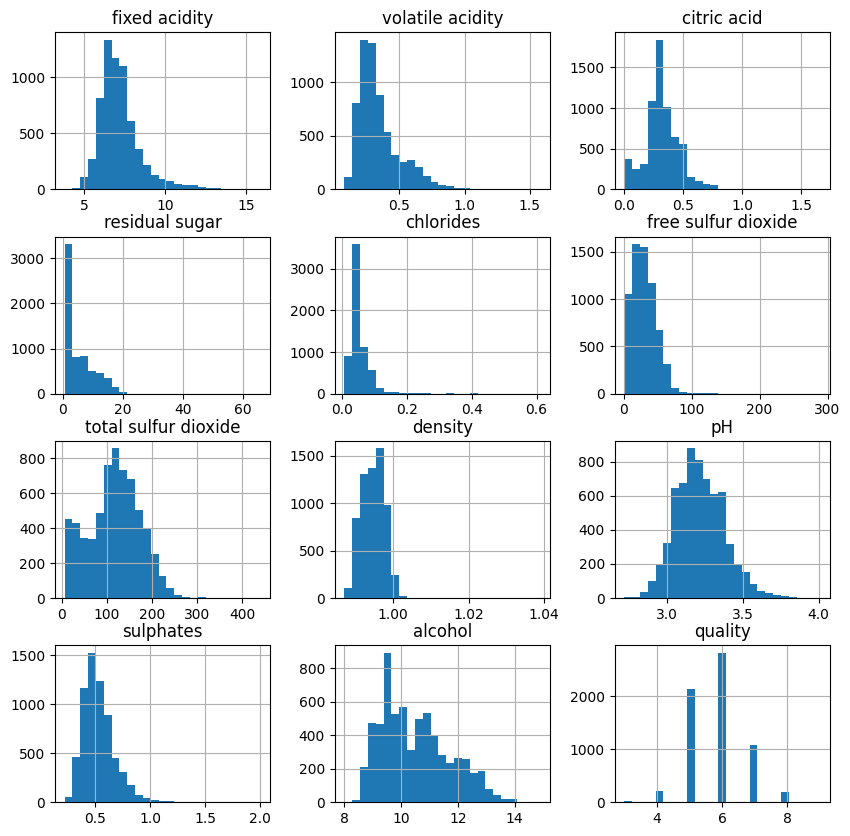

In [7]:
df_cleaned.hist(bins=25,figsize=(10,10))
# display histogram
plt.show()

In [8]:
# Convert 'type' column to integers
df_cleaned['type'] = df_cleaned['type'].map({'white': 0, 'red': 1})

# Display the updated dataframe
print(df_cleaned.head())

   type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     0            7.0              0.27         0.36            20.7   
1     0            6.3              0.30         0.34             1.6   
2     0            8.1              0.28         0.40             6.9   
3     0            7.2              0.23         0.32             8.5   
4     0            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.44     

C:\Users\choon\AppData\Local\Temp\ipykernel_29264\2767178509.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['type'] = df_cleaned['type'].map({'white': 0, 'red': 1})


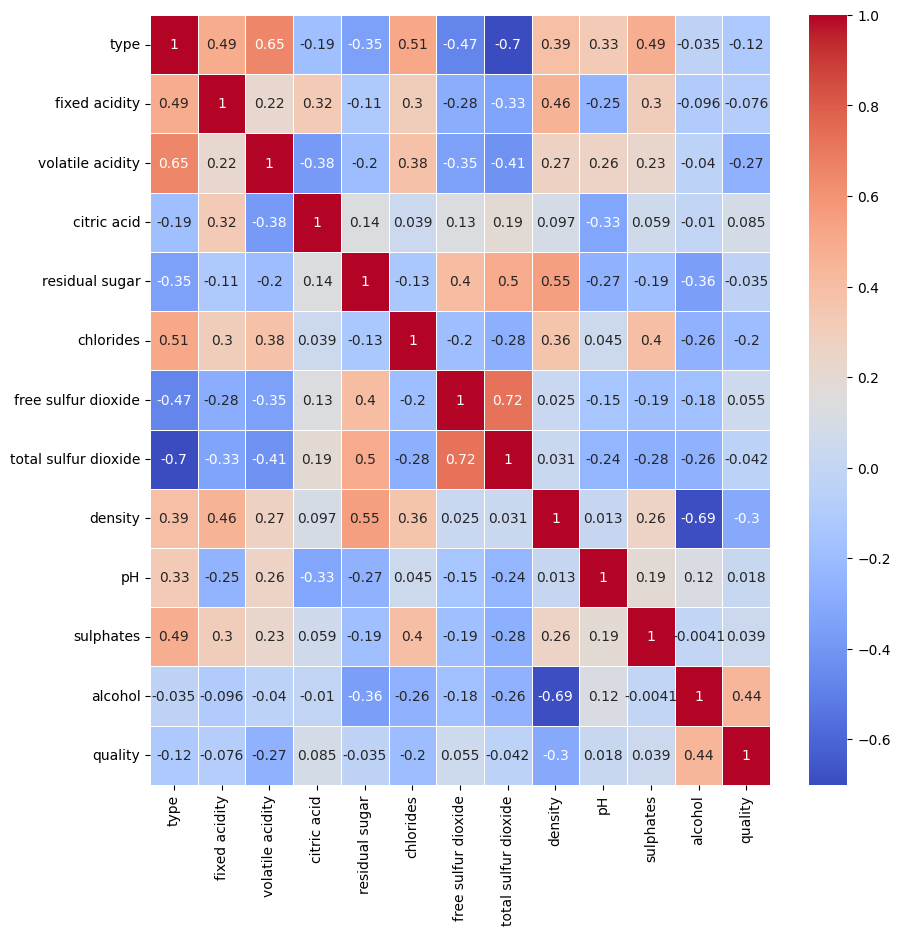

In [9]:
# corr of the data
df_cleaned.corr().T
plt.figure(figsize=(10, 10))

# Exclude non-numeric columns from correlation calculation
numeric_df = df_cleaned.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

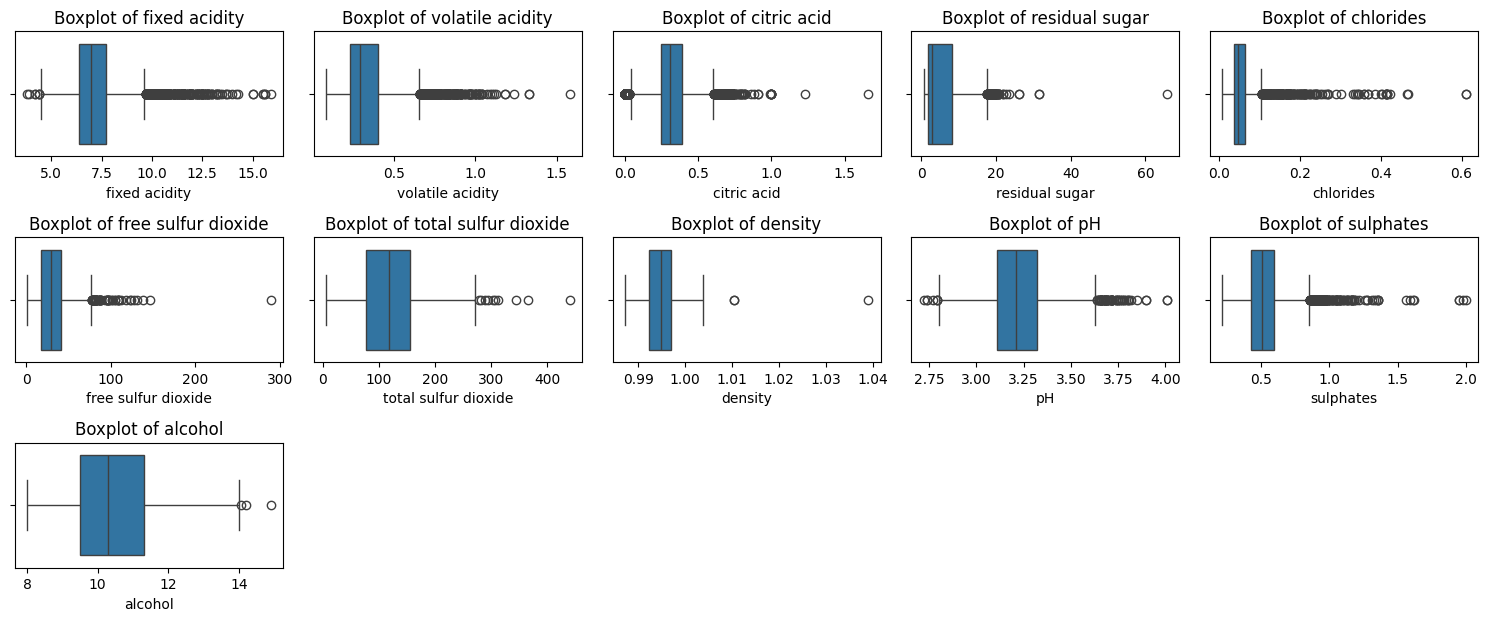

In [ ]:
# plot boxplots for each numeric feature to visually identity coutliers
numeric_features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 
                    'free sulfur dioxide','total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

# plotting through seaborn
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(5, 5, i)  # Adjust subplot grid size based on the number of features
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

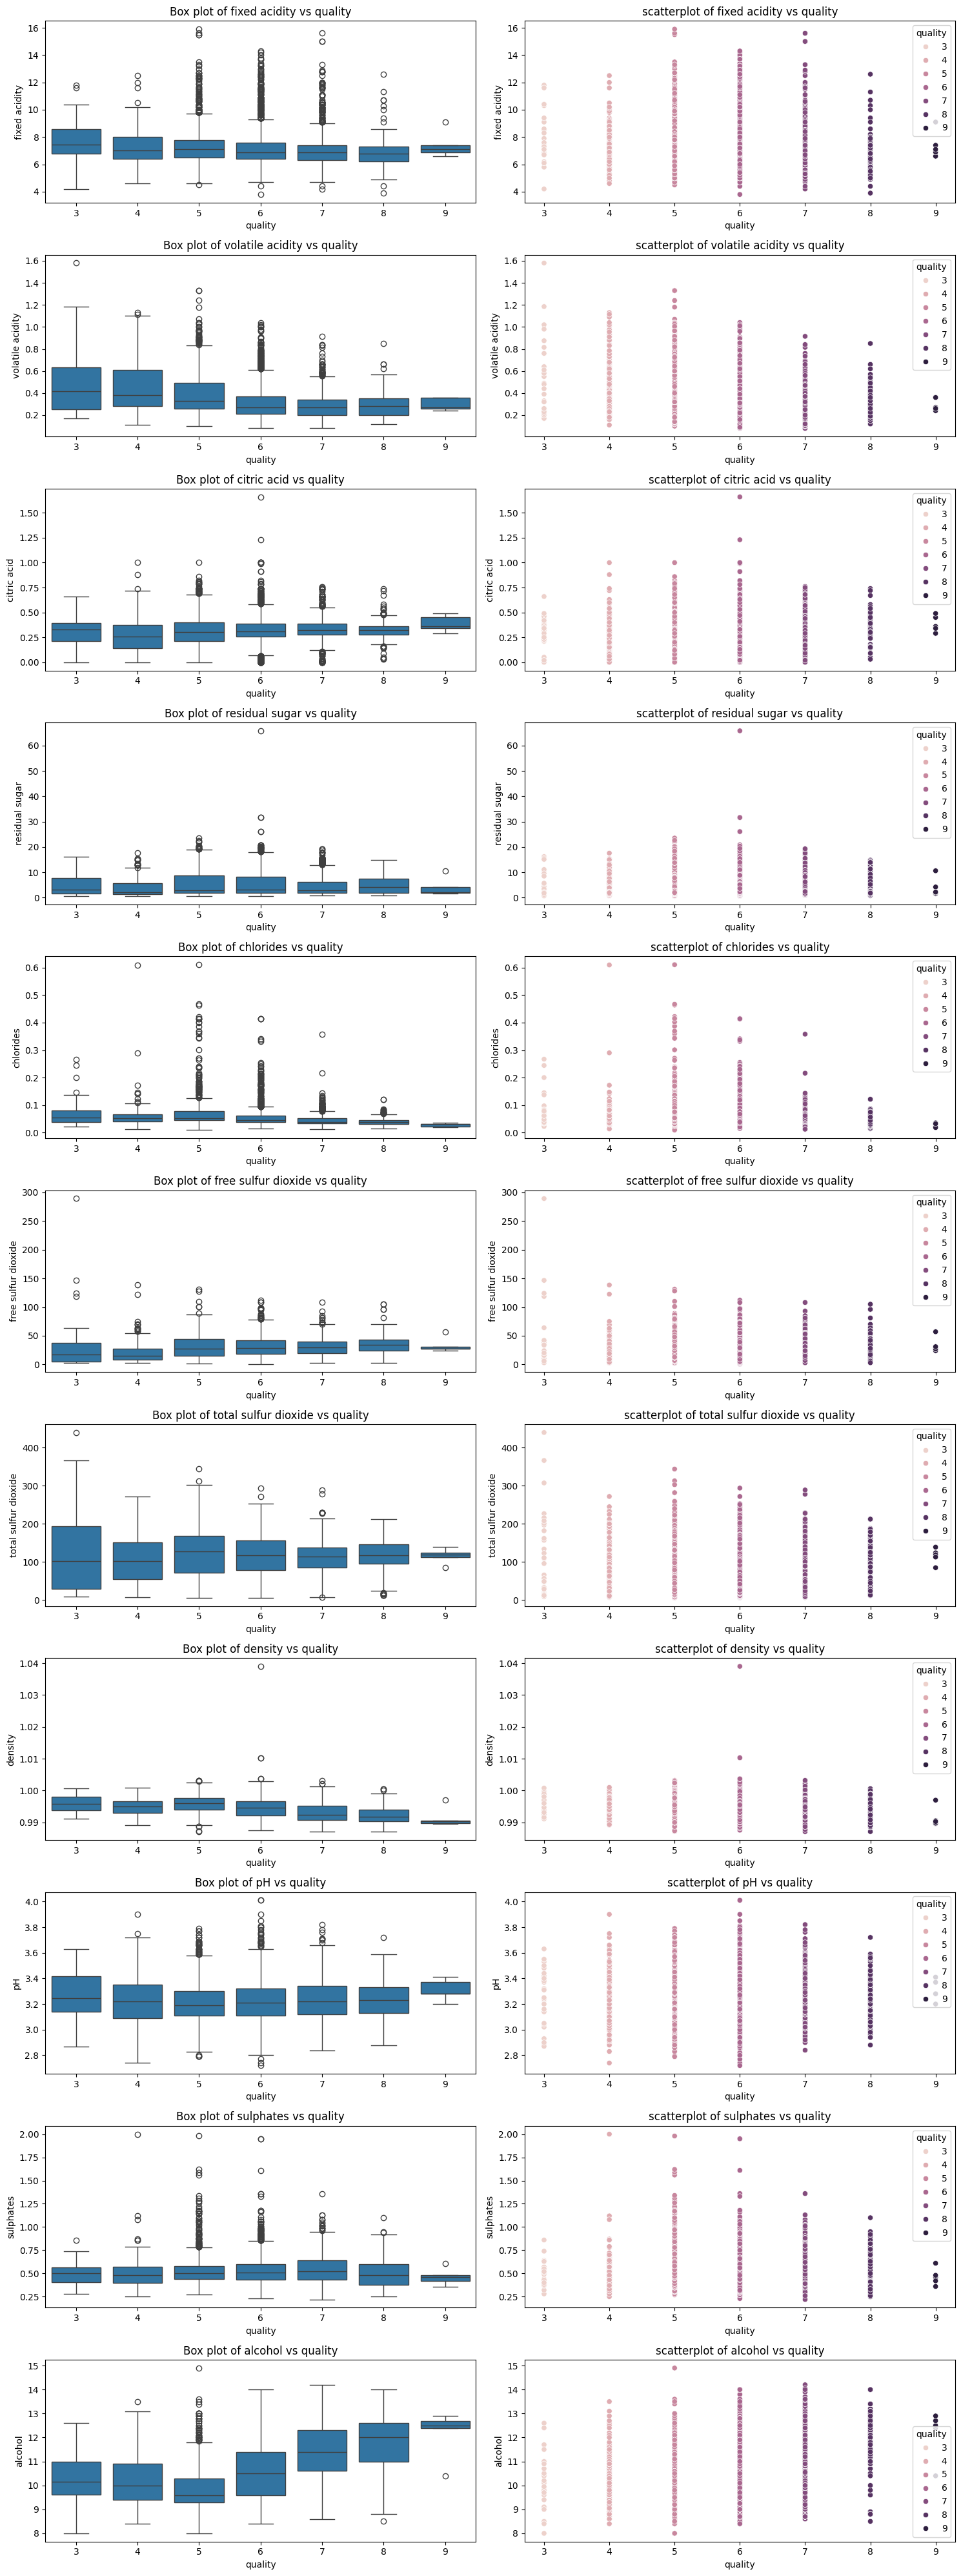

In [11]:
# Define the features
features = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar",
       "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density",
       "pH", "sulphates", "alcohol"]

# Plot the box plots and violin plots of each feature against quality
fig, axes = plt.subplots(11, 2, figsize=(15, 40))
for i, feature in enumerate(features):
    # box plot
    sns.boxplot(x="quality", y=feature, data=df, ax=axes[i, 0])
    axes[i, 0].set_title(f"Box plot of {feature} vs quality")
    # scatter plot
    sns.scatterplot(x="quality", y=feature, data=df, hue="quality", ax=axes[i, 1])
    axes[i, 1].set_title(f"scatterplot of {feature} vs quality")
plt.tight_layout()
plt.show()


C:\Users\choon\AppData\Local\Temp\ipykernel_29264\1821158390.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=df, palette='viridis')


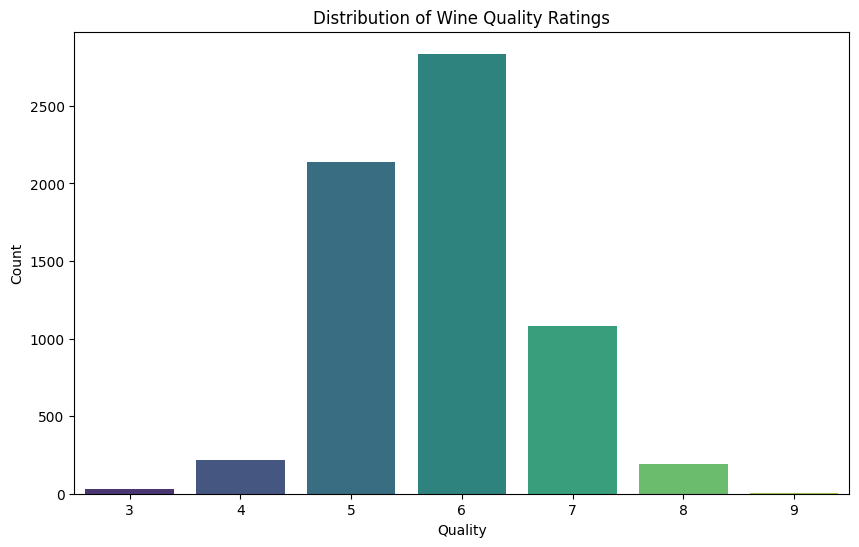

In [12]:
# Plot the distribution of wine quality ratings
plt.figure(figsize=(10, 6))
sns.countplot(x='quality', data=df, palette='viridis')
plt.title('Distribution of Wine Quality Ratings')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

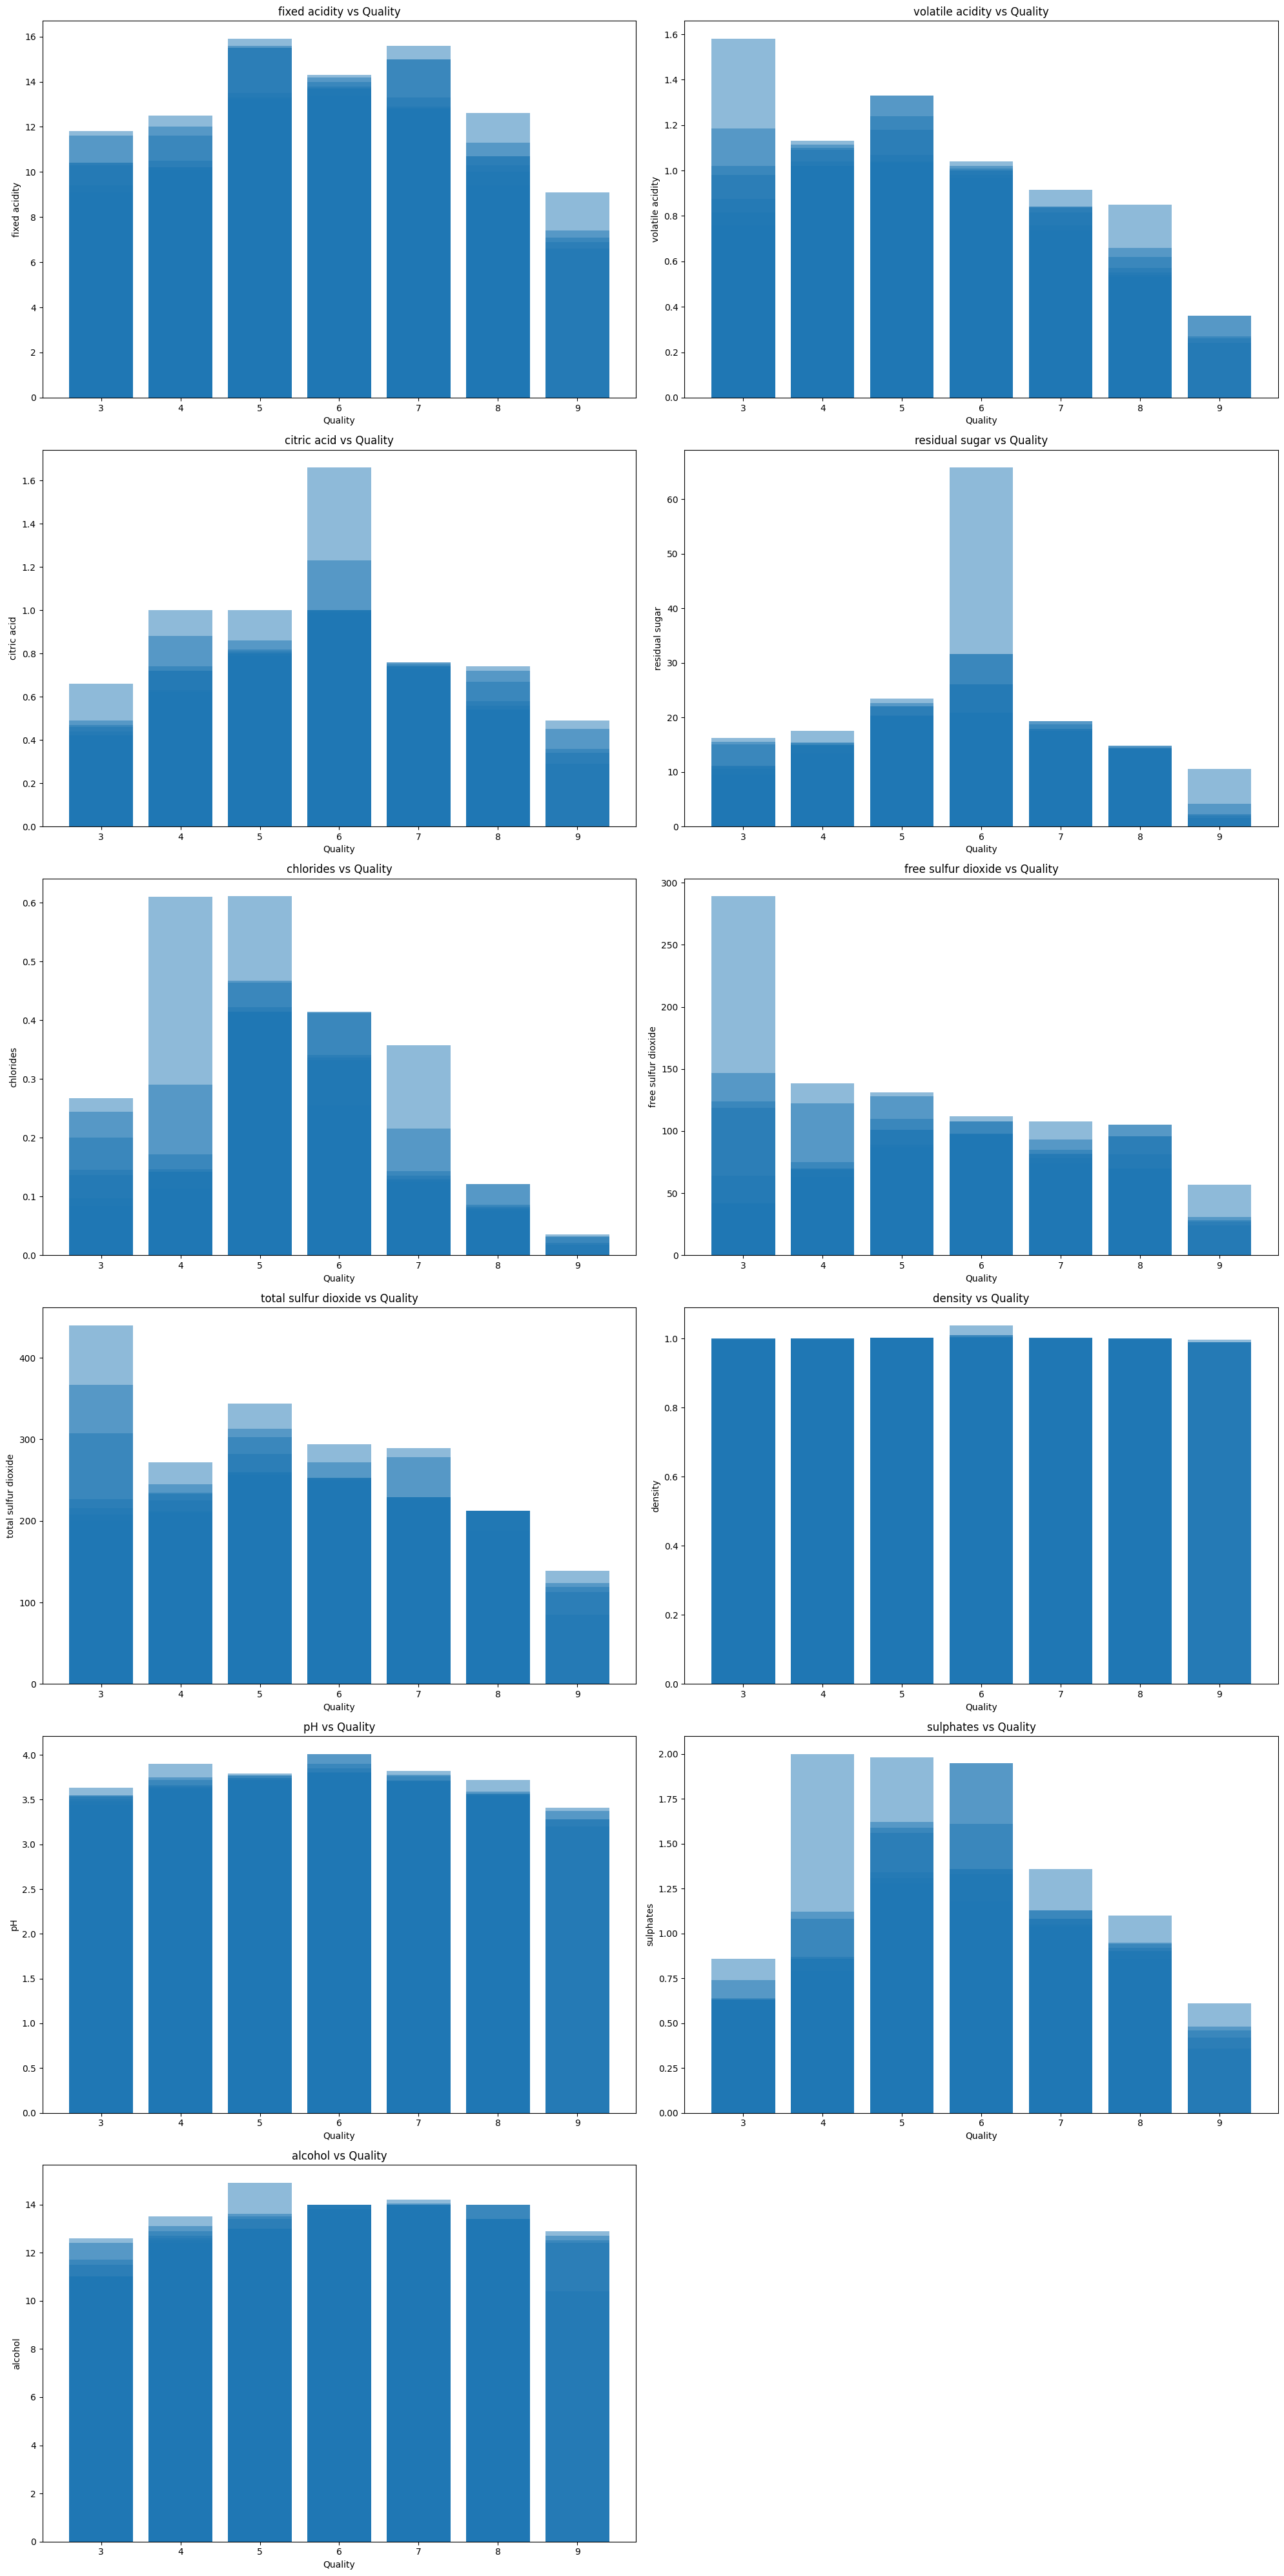

In [13]:
# Define the features
features = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar",
    "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density",
    "pH", "sulphates", "alcohol"]

# Create subplots
plt.figure(figsize=(20, 40))
for i, feature in enumerate(features, 1):
    plt.subplot(6, 2, i)
    plt.bar(df_cleaned['quality'], df_cleaned[feature], alpha=0.5)
    plt.title(f'{feature} vs Quality')
    plt.xlabel('Quality')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()

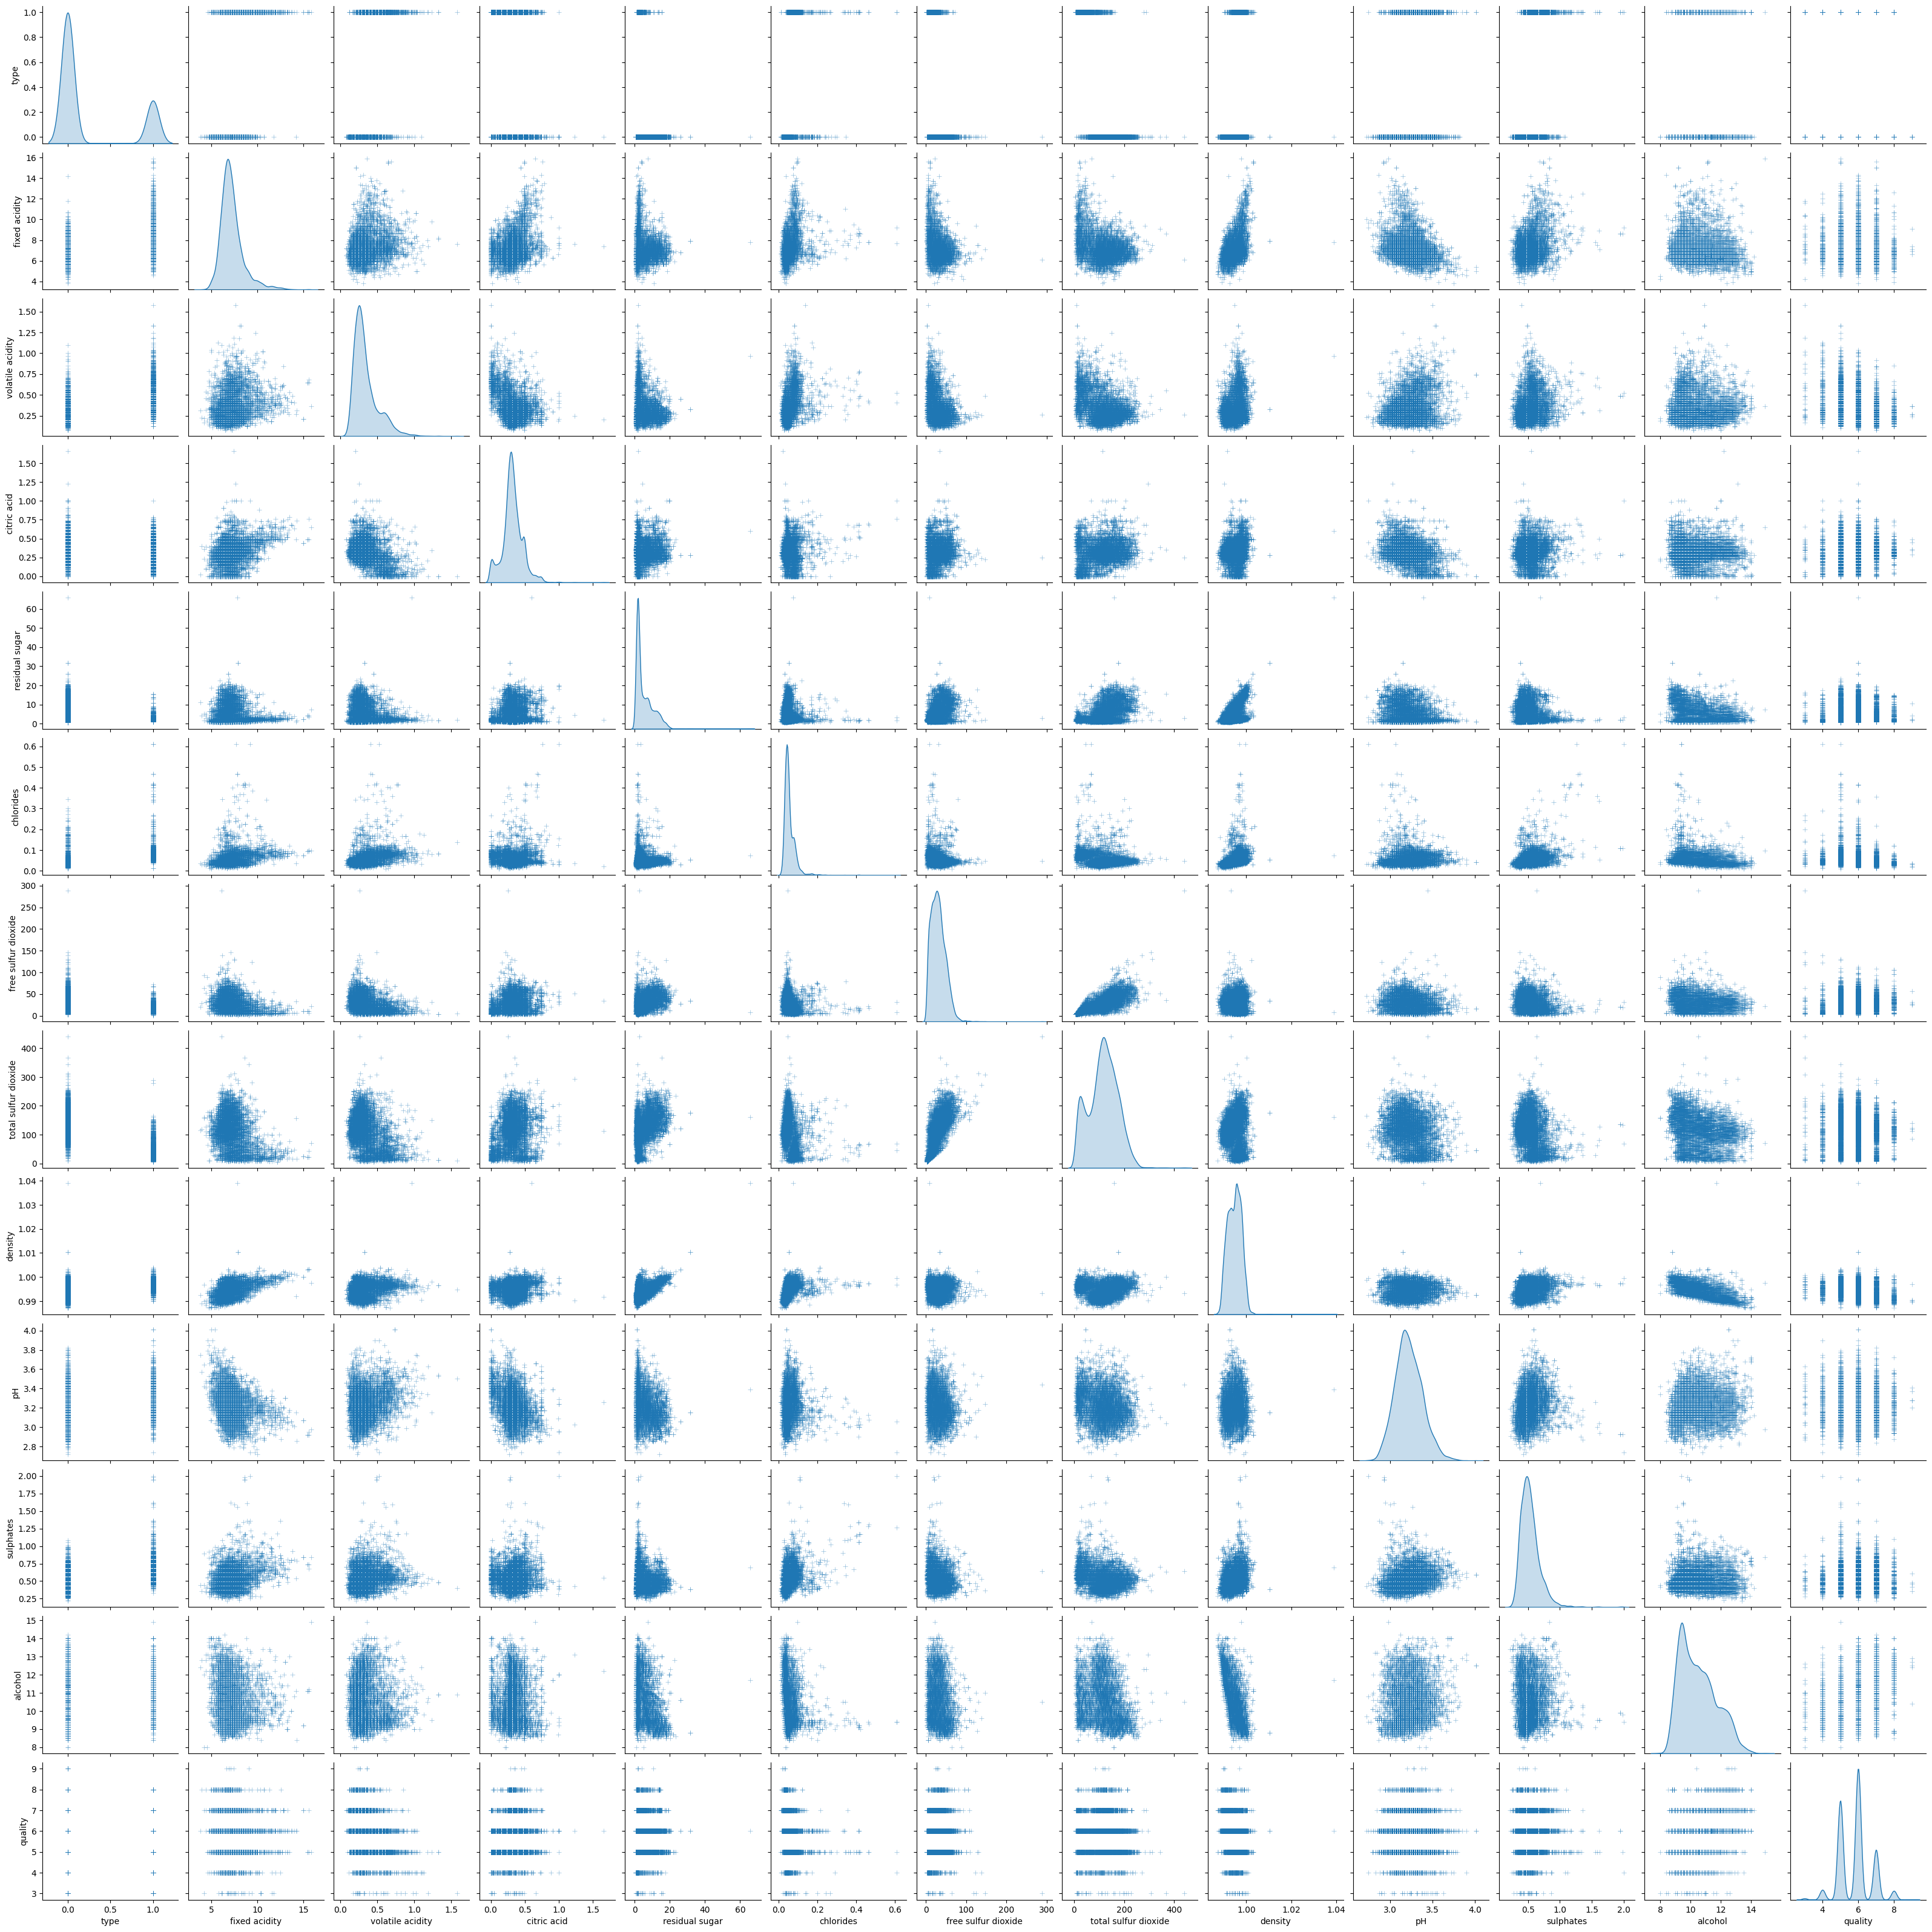

In [14]:
# Generate a pair plot for the cleaned dataset
sns.pairplot(df_cleaned, diag_kind='kde', markers='+', plot_kws={'alpha':0.5})
plt.show()

In [15]:
df_cleaned.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,0,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,0,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [16]:
# Ensure that the dataset has at least 1000 rows after preprocessing
if len(df_cleaned) < 1000:
    raise ValueError("Dataset contains fewer than 1000 samples after preprocessing.")

# Save the preprocessed dataset
df_cleaned.to_csv('wine_preprocessed_1.csv', index=False)
print("Preprocessing complete. Dataset saved.")

Preprocessing complete. Dataset saved.
